<a href="https://colab.research.google.com/github/nhattminh160901/Do_An_2022/blob/main/doan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
data = pd.read_csv("https://raw.githubusercontent.com/nhattminh160901/Do_An_2022/main/insurance.csv")

In [219]:
df = pd.DataFrame(data)

In [220]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [221]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [222]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [223]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [224]:
non_smoker_df = df[df["smoker"] == "no"]
smoker_df = df[df["smoker"] == "yes"]

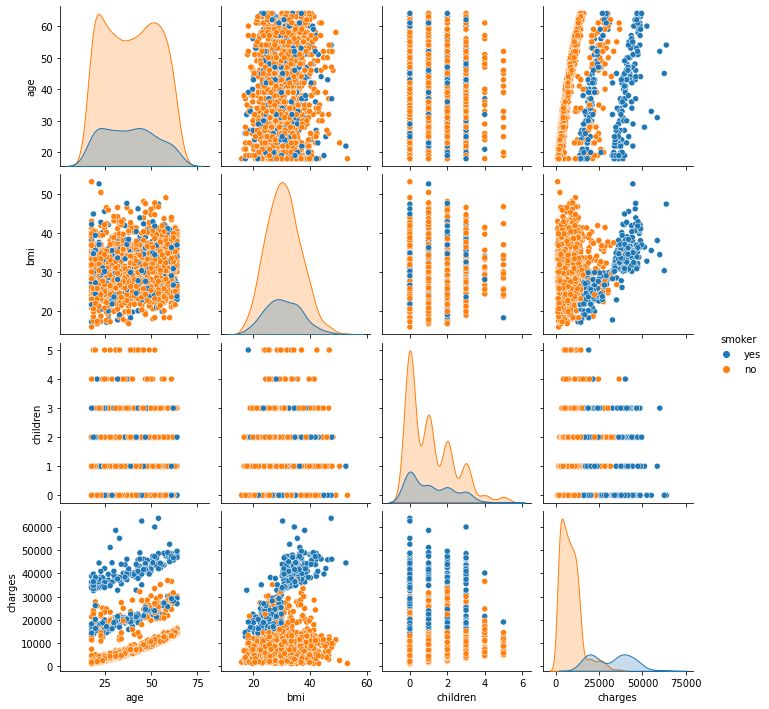

In [225]:
sns.pairplot(df, hue="smoker")
plt.show()

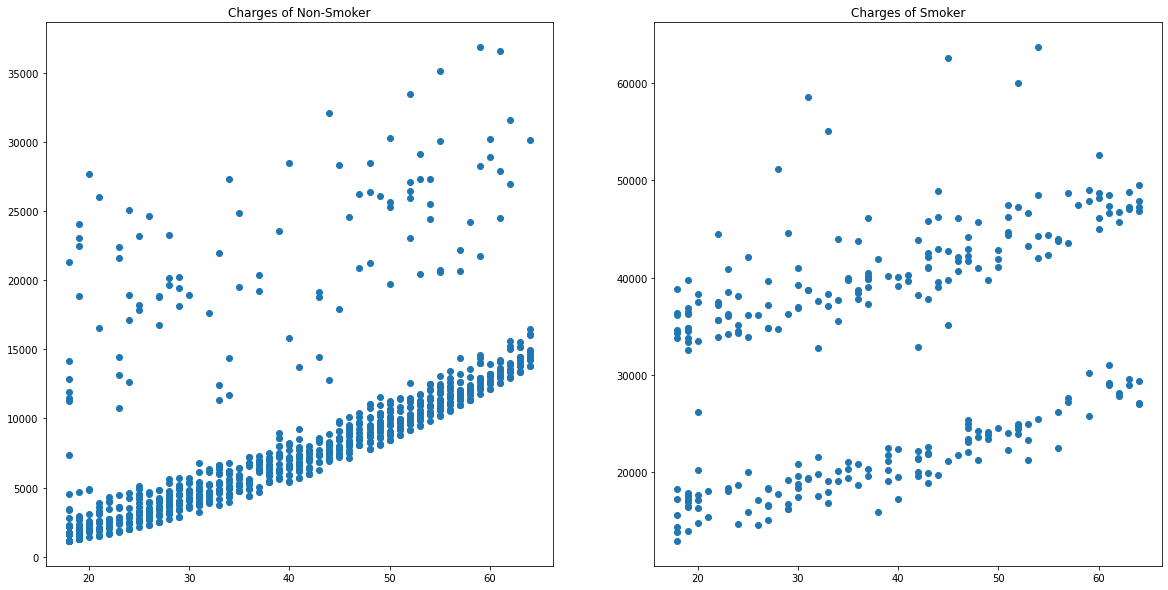

In [226]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20, 10))

axes[0].scatter(data=non_smoker_df, x="age", y="charges")
axes[0].set_title("Charges of Non-Smoker")

axes[1].scatter(data=smoker_df, x="age", y="charges")
axes[1].set_title("Charges of Smoker");

Non Smoker

In [227]:
from sklearn import linear_model

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [228]:
non_smoker_x, non_smoker_y = non_smoker_df.age.values.reshape(-1, 1), non_smoker_df.charges.values

In [229]:
x = np.array([i for i in range(np.min(non_smoker_x), np.max(non_smoker_x)+1)])
x = x.reshape(-1, 1)

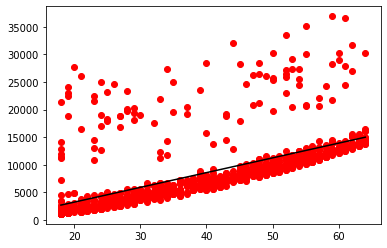

In [230]:
lnregr = linear_model.LinearRegression().fit(non_smoker_x, non_smoker_y)
y_pred = lnregr.predict(x)
plt.scatter(non_smoker_x, non_smoker_y, color="red")
plt.plot(x, y_pred, color="black")
# print("test score:", 100*lnregr.score(x_test, y_test), "%")

In [231]:
coefficient = lnregr.coef_
coefficient

array([267.24891283])

In [232]:
non_smoker_df = non_smoker_df[non_smoker_df["charges"]< non_smoker_df["age"]*coefficient]

Text(0.5, 1.0, 'Charges of Non-Smoker after exception outlier')

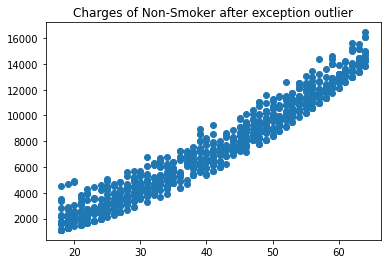

In [233]:
plt.scatter(data=non_smoker_df, x="age", y="charges")
plt.title("Charges of Non-Smoker after exception outlier")

In [234]:
non_smoker_x, non_smoker_y = non_smoker_df.age.values.reshape(-1, 1), non_smoker_df.charges.values

In [235]:
dataset = np.concatenate((non_smoker_x, non_smoker_y.reshape(-1, 1)), axis=1)

In [236]:
np.random.shuffle(dataset)
sfdt = np.array_split(dataset, 10)

In [237]:
train = np.concatenate(sfdt[:7])
test = np.concatenate(sfdt[7:])
x_train, y_train = train[:, :1], train[:, 1]
x_test, y_test = test[:, :1], test[:, 1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((677, 1), (677,), (288, 1), (288,))

test score: 95.36738454485089 %


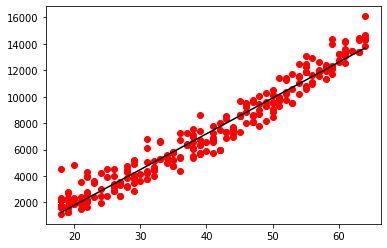

In [238]:
lnregr = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = lnregr.predict(x)
plt.scatter(x_test, y_test, color="red")
plt.plot(x, y_pred, color="black")
print("test score:", 100*lnregr.score(x_test, y_test), "%")

In [239]:
y_pred = lnregr.predict(x_test)
rmse(y_test, y_pred)

828.4537893920295

Smoker

In [240]:
smoker_df1 = smoker_df[smoker_df["charges"]>30000]

In [243]:
from scipy import stats
smoker_df1["z_score"]=stats.zscore(smoker_df1["charges"])
smoker_df1 = smoker_df1.loc[smoker_df1["z_score"].abs()<=3]

In [244]:
smoker_x1, smoker_y1 = smoker_df1.age.values.reshape(-1, 1), smoker_df1.charges.values

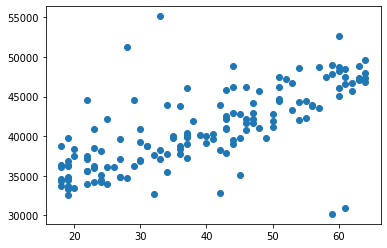

In [245]:
plt.scatter(smoker_x1, smoker_y1)

In [246]:
dataset1 = np.concatenate((smoker_x1, smoker_y1.reshape(-1, 1)), axis=1)

In [247]:
np.random.shuffle(dataset1)
sfdt1 = np.array_split(dataset1, 10)

In [248]:
train1 = np.concatenate(sfdt1[:7])
test1 = np.concatenate(sfdt1[7:])
x_train1, y_train1 = train1[:, :1], train1[:, 1]
x_test1, y_test1 = test1[:, :1], test1[:, 1]
x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape

((105, 1), (105,), (43, 1), (43,))

In [249]:
x1 = np.array([i for i in range(np.min(smoker_x1), np.max(smoker_x1)+1)])
x1 = x1.reshape(-1, 1)

test score: 49.06495479831422 %


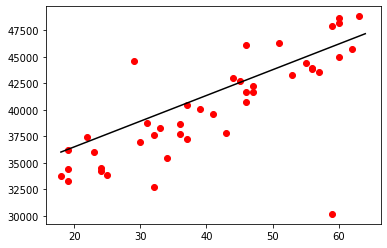

In [250]:
lnregr1 = linear_model.LinearRegression().fit(x_train1, y_train1)
y_pred1 = lnregr1.predict(x1)
plt.scatter(x_test1, y_test1, color="red")
plt.plot(x1, y_pred1, color="black")
print("test score:", 100*lnregr1.score(x_test1, y_test1), "%")

In [251]:
y_pred1 = lnregr1.predict(x_test1)
rmse(y_test1, y_pred1)

3437.242284164085

In [252]:
smoker_df2 = smoker_df[smoker_df["charges"]<=30000]

In [255]:
smoker_df2["z_score"]=stats.zscore(smoker_df2["charges"])
smoker_df2 = smoker_df2.loc[smoker_df2["z_score"].abs()<=3]

In [256]:
smoker_x2, smoker_y2 = smoker_df2.age.values.reshape(-1, 1), smoker_df2.charges.values

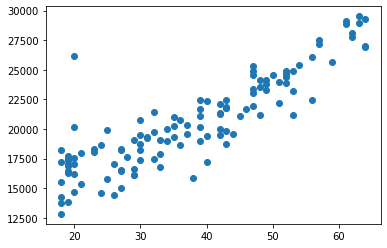

In [257]:
plt.scatter(smoker_x2, smoker_y2)

In [258]:
dataset2 = np.concatenate((smoker_x2, smoker_y2.reshape(-1, 1)), axis=1)

In [259]:
np.random.shuffle(dataset2)
sfdt2 = np.array_split(dataset2, 10)

In [260]:
train2 = np.concatenate(sfdt2[:7])
test2 = np.concatenate(sfdt2[7:])
x_train2, y_train2 = train2[:, :1], train2[:, 1]
x_test2, y_test2 = test2[:, :1], test2[:, 1]
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((86, 1), (86,), (36, 1), (36,))

In [261]:
x2 = np.array([i for i in range(np.min(smoker_x2), np.max(smoker_x2)+1)])
x2 = x2.reshape(-1, 1)

test score: 84.04841879790688 %


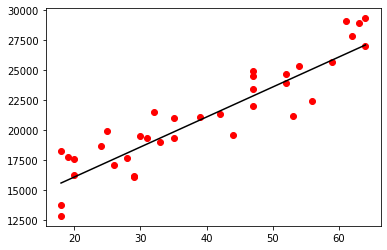

In [262]:
lnregr2 = linear_model.LinearRegression().fit(x_train2, y_train2)
y_pred2 = lnregr2.predict(x2)
plt.scatter(x_test2, y_test2, color="red")
plt.plot(x2, y_pred2, color="black")
print("test score:", 100*lnregr2.score(x_test2, y_test2), "%")

In [263]:
y_pred2 = lnregr2.predict(x_test2)
rmse(y_test2, y_pred2)

1692.2792095337554

In [264]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df
le.fit(df2.smoker.drop_duplicates())
df2.smoker = le.transform(df2.smoker)
df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [265]:
smoker = df2[df2.smoker==1]
non_smoker = df2[df2.smoker==0]

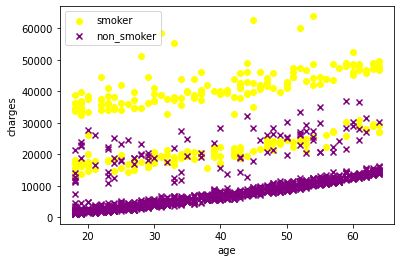

In [266]:
fig, ax = plt.subplots()
ax.scatter(smoker["age"], smoker["charges"], label="smoker", color="yellow")
ax.scatter(non_smoker["age"], non_smoker["charges"], label="non_smoker", marker="x", color="purple")
ax.set_xlabel("age")
ax.set_ylabel("charges")
ax.legend()

In [267]:
data_age = df2.age.values.reshape(-1, 1)
data_charges = df2.charges.values.reshape(-1, 1)
x3 = np.concatenate((data_age, data_charges), axis=1)

In [269]:
data_smoker_y = df2.smoker.values

In [270]:
dataset3 = np.concatenate((x3, data_smoker_y.reshape(-1, 1)), axis=1)

In [271]:
np.random.shuffle(dataset3)
sfdt3 = np.array_split(dataset3, 10)

In [272]:
train3 = np.concatenate(sfdt3[:7])
test3 = np.concatenate(sfdt3[7:])
x_train3, y_train3 = train3[:, :2], train3[:, 2]
x_test3, y_test3 = test3[:, :2], test3[:, 2]
x_train3.shape, y_train3.shape, x_test3.shape, y_test3.shape

((938, 2), (938,), (400, 2), (400,))

In [273]:
logreg = linear_model.LogisticRegression().fit(x_train3, y_train3)
print("test score:", 100*logreg.score(x_test3, y_test3), "%")

test score: 91.75 %


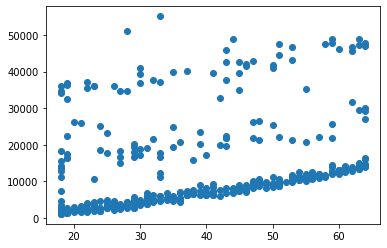

In [274]:
plt.scatter(x_test3[:, 0], x_test3[:, 1])

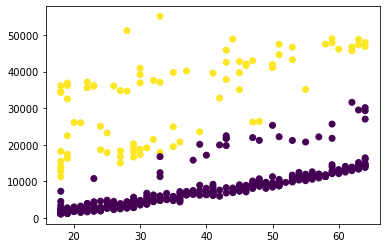

In [275]:
plt.scatter(x_test3[:, 0], x_test3[:, 1], c=logreg.predict(x_test3))

In [276]:
y_test3[12]

0.0

In [277]:
y_pred3 = logreg.predict(x_test3)
y_pred3[12]

0.0

In [278]:
rmse(y_test3 ,y_pred3)

0.2872281323269014